In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from keras.layers import Dropout, Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg19 import VGG19
from tensorflow.keras.models import Model
from keras.applications.vgg19 import preprocess_input
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import os
import numpy as np
from glob import glob

ModuleNotFoundError: No module named 'tensorflow'

In [5]:
train_directory = "\Users\WINNIE\Documents\Winnie_Project\Winnie_Project\dataset_2\train"
validation_directory = "\Users\WINNIE\Documents\Winnie_Project\Winnie_Project\dataset_2\test"

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 0-1: truncated \UXXXXXXXX escape (<ipython-input-5-e1d159ac168d>, line 1)

In [3]:
train_Demented_dir = os.path.join(train_directory, 'Demented')  # directory with our training Demented pictures
train_NonDemented_dir = os.path.join(train_directory, 'NonDemented')# directory with our training NonDemented pictures
validation_Demented_dir = os.path.join(validation_directory, 'Demented')  # directory with our validation Demented pictures
validation_NonDemented_dir = os.path.join(validation_directory, 'NonDemented')  # directory with our validation NonDemented pictures

In [4]:
num_NonDemented_tr = len(os.listdir(train_NonDemented_dir))
num_Demented_tr = len(os.listdir(train_Demented_dir))
num_NonDemented_val = len(os.listdir(validation_NonDemented_dir))
num_Demented_val = len(os.listdir(validation_Demented_dir))

In [5]:
total_train = num_NonDemented_tr + num_Demented_tr
total_val = num_NonDemented_val + num_Demented_val 

In [6]:
print('total training NonDemented images:', num_NonDemented_tr)
print('total training Demented images:', num_Demented_tr)


print('total validation  NonDemented images:', num_NonDemented_val)
print('total validation Demented images:', num_Demented_val)


print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training NonDemented images: 2560
total training Demented images: 2509
total validation  NonDemented images: 640
total validation Demented images: 627
--
Total training images: 5069
Total validation images: 1267


In [7]:
# re-size all the images to this
image_size= [150, 150]
batch_size =128
epochs =10

In [8]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

In [9]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_directory,
                                                           shuffle=True,
                                                           target_size=image_size,
                                                            classes=['Demented','NonDemented'])

Found 5069 images belonging to 2 classes.


In [10]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_directory,
                                                              target_size=image_size,
                                                               classes=['Demented','NonDemented'])

Found 1267 images belonging to 2 classes.


In [11]:
sample_training_images, _ = next(train_data_gen)

In [12]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(15,15))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

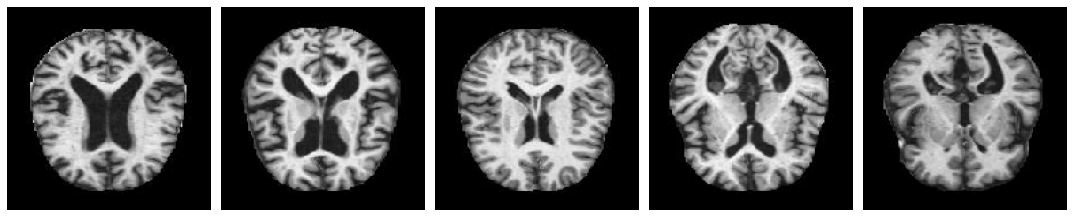

In [13]:
plotImages(sample_training_images[:5])

In [14]:
# add preprocessing layer to the front of VGG
vgg = VGG19(input_shape=image_size + [3], weights='imagenet', include_top=False)

for layer in vgg.layers:
  layer.trainable = False

In [15]:
vgg.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [16]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)
detection=Dense(2, activation='softmax')(x)

In [17]:
# create a model object
model = Model(inputs=vgg.input, outputs=detection)


In [18]:
model.compile(optimizer='adam',
                  loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                  metrics=['accuracy'])
# view the structure of the model
model.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [19]:
history = model.fit(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size)

Epoch 1/10
39/39 [==============================] - 1109s 28s/step - loss: 0.6956 - accuracy: 0.6110 - val_loss: 0.6813 - val_accuracy: 0.6311
Epoch 2/10
39/39 [==============================] - 1102s 28s/step - loss: 0.6621 - accuracy: 0.6938 - val_loss: 0.6629 - val_accuracy: 0.6892
Epoch 3/10
39/39 [==============================] - 1098s 28s/step - loss: 0.6498 - accuracy: 0.7241 - val_loss: 0.6599 - val_accuracy: 0.6892
Epoch 4/10
39/39 [==============================] - 1270s 33s/step - loss: 0.6431 - accuracy: 0.7403 - val_loss: 0.6544 - val_accuracy: 0.7057
Epoch 5/10
39/39 [==============================] - 1183s 30s/step - loss: 0.6403 - accuracy: 0.7420 - val_loss: 0.6645 - val_accuracy: 0.6745
Epoch 6/10
39/39 [==============================] - 1139s 29s/step - loss: 0.6363 - accuracy: 0.7480 - val_loss: 0.6607 - val_accuracy: 0.6797
Epoch 7/10
39/39 [==============================] - 1086s 28s/step - loss: 0.6295 - accuracy: 0.7652 - val_loss: 0.6542 - val_accuracy: 0.6910

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)

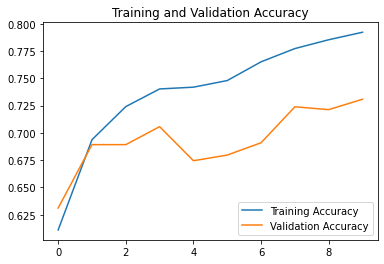

In [21]:
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

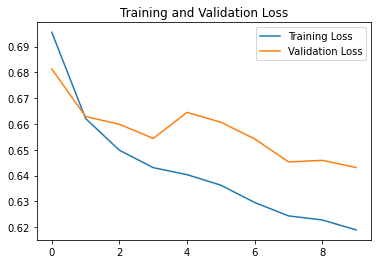

In [22]:
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [23]:
val_data_img_1= (val_data_gen)
loss,acc = model.evaluate(val_data_img_1)
print('Loss without data augmentation', loss)
print(" ")
print('accuracy without data augmentation',acc)


10/10 [==============================] - 208s 21s/step - loss: 0.6429 - accuracy: 0.7324
Loss without data augmentation 0.6429163217544556
 
accuracy without data augmentation 0.7324388027191162


In [24]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

In [25]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_directory,
                                               shuffle=True,
                                               target_size=image_size)

Found 5069 images belonging to 2 classes.


In [26]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]

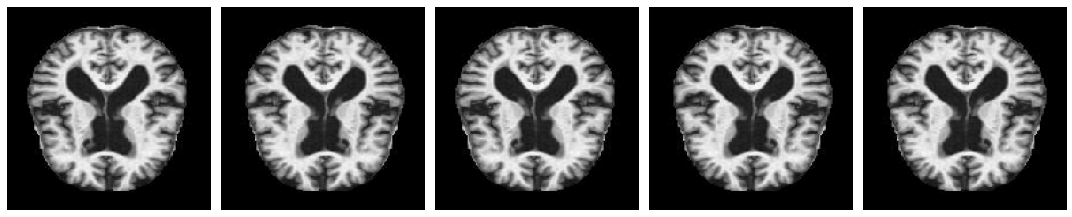

In [27]:
# Re-use the same custom plotting function defined and used
# above to visualize the training images
plotImages(augmented_images)

In [28]:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)

In [30]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_directory,
                                               shuffle=True,
                                               target_size=image_size)

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

Found 5069 images belonging to 2 classes.


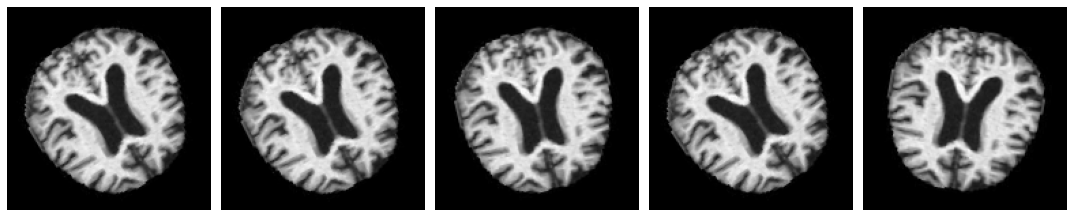

In [31]:
plotImages(augmented_images)

In [32]:
# zoom_range from 0 - 1 where 1 = 100%.
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5) # 

In [33]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_directory,
                                               shuffle=True,
                                               target_size=image_size)

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

Found 5069 images belonging to 2 classes.


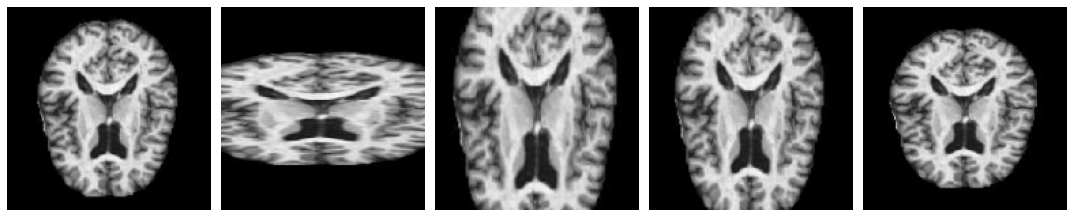

In [34]:
plotImages(augmented_images)

In [35]:
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )

In [36]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_directory,
                                                     shuffle=True,
                                                     target_size=image_size,
                                                      classes=['Demented','NonDemented'])

Found 5069 images belonging to 2 classes.


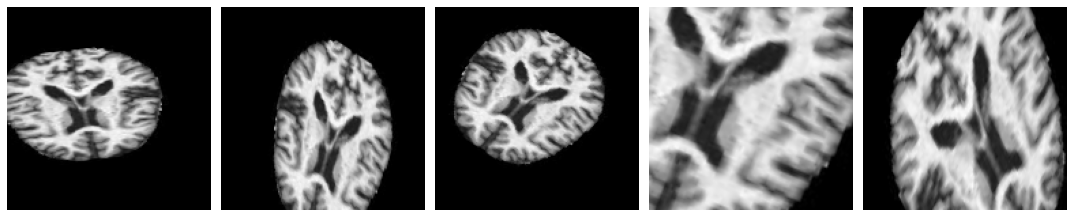

In [37]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [38]:
image_gen_val = ImageDataGenerator(rescale=1./255)

In [39]:
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=validation_directory,
                                                 target_size=image_size,
                                                  classes=['Demented','NonDemented'])

Found 1267 images belonging to 2 classes.


In [40]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)
detection=Dense(2, activation='softmax')(x)

In [61]:
# create a model object
model_new=tf.keras.layers.Dropout(.5)
model_new = Model(inputs=vgg.input, outputs=detection)


In [62]:
model_new.compile(optimizer='adam',
                  loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                  metrics=['accuracy'])
# view the structure of the model
model_new.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0   

In [ ]:
history = model_new.fit(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Epoch 1/10
13/39 [=========>....................] - ETA: 10:28 - loss: 0.6732 - accuracy: 0.6572

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)

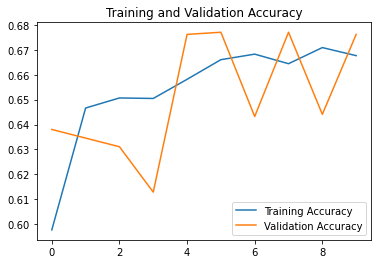

In [51]:
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

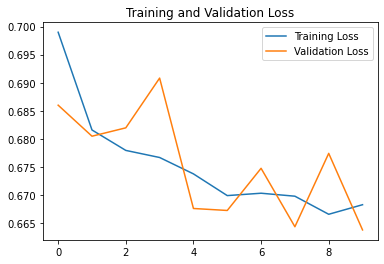

In [52]:
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()